# Projeto de Análise dos salários na área de Data Science


## Preparação 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ds_salaries.csv to ds_salaries (2).csv


In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
dataset = pd.read_csv('/content/ds_salaries.csv')

In [ ]:
dataset.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [ ]:
dataset.rename(columns={'Unnamed: 0': 'index'})

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## Limpeza dos dados

In [ ]:
dataset.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
dataset[pd.isnull(dataset.work_year)].sum()

Unnamed: 0            0.0
work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

In [ ]:
dataset.loc[dataset.salary_in_usd.isnull()]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size




*   Não há colunas classificas de forma errada ou linhas em branco



## Exploração dos dados e Gráficos

In [ ]:
dataset.groupby('work_year').salary_in_usd.agg([len,min,max,'mean'])

,len,min,max,mean
work_year,,,,
2020,72,5707,450000,95813.000000
2021,217,2859,600000,99853.792627
2022,318,10000,405000,124522.006289


Text(0, 0.5, 'Salário em Dolar')

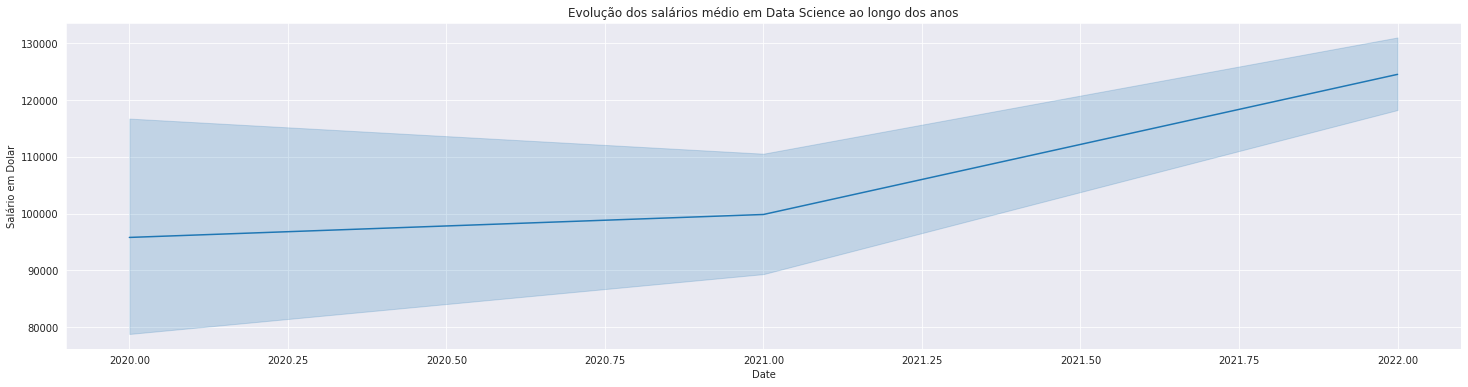

In [ ]:
plt.figure(figsize=(25,6))
sns.set_style("darkgrid")
plt.title("Evolução dos salários médio em Data Science ao longo dos anos")
sns.lineplot(y=dataset["salary_in_usd"],x=dataset['work_year'])
plt.xlabel("Date")
plt.ylabel("Salário em Dolar")

In [ ]:
dataset.groupby('job_title').salary_in_usd.agg([len,min,max,'mean']).sort_values(by='len', ascending=False)

,len,min,max,mean
job_title,,,,
Data Scientist,143,2859,412000,108187.832168
Data Engineer,132,4000,324000,112725.000000
Data Analyst,97,6072,200000,92893.061856
Machine Learning Engineer,41,20000,250000,104880.146341
Research Scientist,16,42000,450000,109019.500000
Data Science Manager,12,54094,241000,158328.500000
Data Architect,11,90700,266400,177873.909091
Big Data Engineer,8,5882,114047,51974.000000
Machine Learning Scientist,8,12000,260000,158412.500000


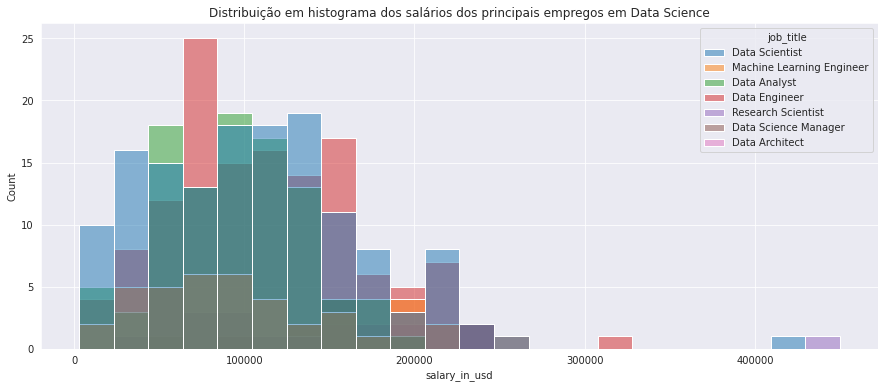

In [ ]:
main_jobs = dataset.loc[dataset.job_title.isin(['Data Scientist', 'Data Engineer','Data Analyst', 'Machine Learning Engineer', 'Research Scientist', 'Data Science Manager', 'Data Architect'])]
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
plt.title("Distribuição em histograma dos salários dos principais empregos em Data Science")
sns.histplot(data=main_jobs, x='salary_in_usd', hue='job_title')

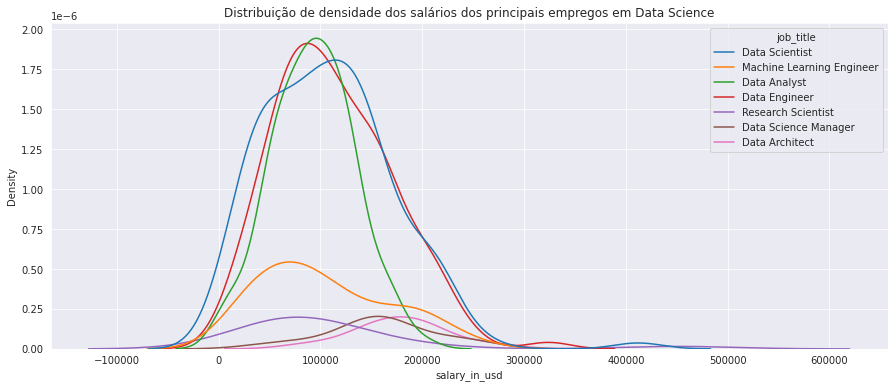

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Distribuição de densidade dos salários dos principais empregos em Data Science")
sns.kdeplot(data=main_jobs, x='salary_in_usd', hue='job_title', shade=False)

In [ ]:
dataset.groupby('company_size').salary_in_usd.mean()

company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64

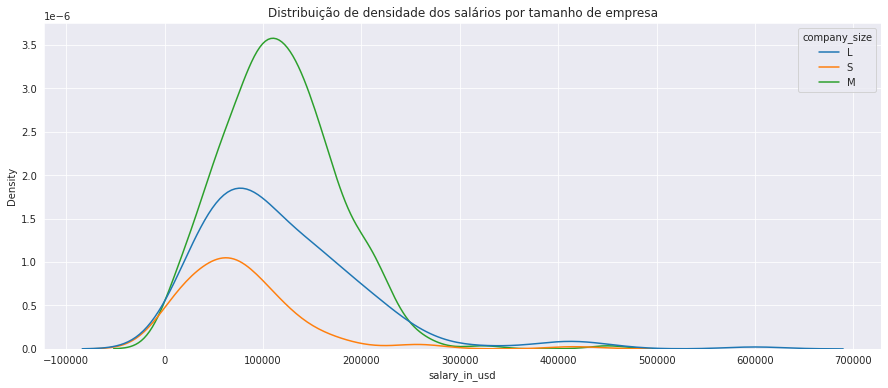

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Distribuição de densidade dos salários por tamanho de empresa")
sns.kdeplot(data=dataset, x='salary_in_usd', hue='company_size')

In [ ]:
dataset.groupby('company_location').salary_in_usd.mean().sort_values(ascending=False)

company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
AU    108042.666667
AE    100000.000000
DZ    100000.000000
IQ    100000.000000
CA     99823.733333
SG     89294.000000
BE     85699.000000
DE     81887.214286
GB     81583.042553
AT     72920.750000
CN     71665.500000
IE     71444.000000
PL     66082.500000
CH     64114.000000
FR     63970.666667
SI     63831.000000
RO     60000.000000
NL     54945.750000
DK     54386.333333
ES     53060.142857
GR     52293.090909
CZ     50937.000000
PT     47793.750000
HR     45618.000000
LU     43942.666667
CL     40038.000000
MY     40000.000000
IT     36366.500000
HU     35735.000000
EE     32974.000000
MX     32123.333333
NG     30000.000000
IN     28581.750000
MT     28369.000000
CO     21844.000000
TR     20096.666667
HN     20000.000000
BR     18602.666667
AS     18053.000000
MD     18000.000000
UA     13400.000000
PK     13333.333333
KE      9272.000000
IR      4000.000000
VN 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


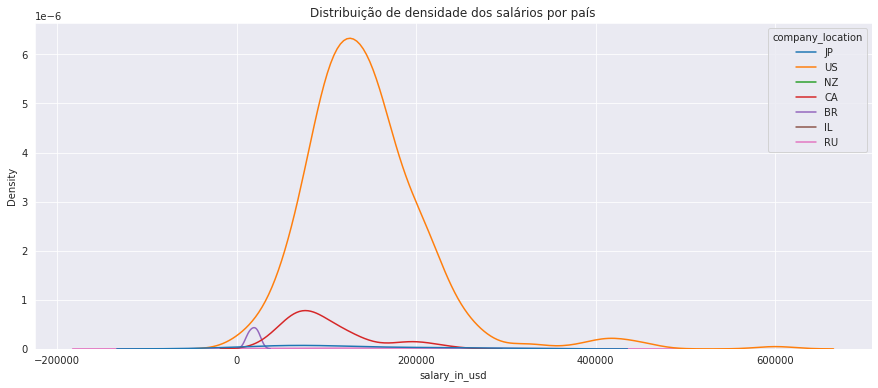

In [ ]:
main_countries = dataset.loc[dataset.company_location.isin(['RU', 'US', 'NZ', 'IL', 'JP','CA','BR'])]
plt.figure(figsize=(15,6))
plt.title("Distribuição de densidade dos salários por país")
sns.kdeplot(data=main_countries, x='salary_in_usd', hue='company_location')

In [ ]:
dataset.loc[dataset.company_location == 'US']

In [ ]:
dataset.groupby(['company_location']).company_location.count().sort_values(ascending=False)

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
PL      4
PT      4
NL      4
AT      4
MX      3
LU      3
TR      3
PK      3
AE      3
AU      3
BR      3
DK      3
CN      2
CZ      2
BE      2
SI      2
RU      2
NG      2
IT      2
CH      2
NZ      1
CL      1
EE      1
SG      1
UA      1
RO      1
CO      1
MY      1
DZ      1
MT      1
MD      1
KE      1
IR      1
IQ      1
AS      1
IL      1
IE      1
HU      1
HR      1
HN      1
VN      1
Name: company_location, dtype: int64

In [ ]:
dataset.groupby(['experience_level','employment_type']).experience_level.agg([len])

len
experience_level employment_type     
EN               CT                 2
                 FT                79
                 PT                 7
EX               CT                 1
                 FT                25
MI               CT                 1
                 FL                 3
                 FT               206
                 PT                 3
SE               CT                 1
                 FL                 1
                 FT               278

In [ ]:
emp_com_loc = dataset.loc[dataset.employee_residence != dataset.company_location]
emp_com_loc.groupby(['company_location','employee_residence']).company_location.agg([len])

len
company_location employee_residence     
AS               IN                    1
AT               DE                    1
CA               GB                    1
                 US                    1
CH               IN                    1
CN               JE                    1
CZ               TN                    1
DE               FR                    1
                 NL                    1
                 PK                    2
                 RS                    1
DK               GR                    1
ES               FR                    1
FR               US                    1
GB               HK                    1
                 PL                    1
                 RO                    1
                 VN                    1
IL               SG                    1
LU               FR                    1
                 PT                    1
MX               AR                    1
MY               JP                    1
PL               IT                    1
RO               ES                    1
US               BG                    1
                 BO                    1
                 BR                    3
                 CA                    1
                 DE                    1
                 ES                    1
                 FR                    1
                 GR                    1
                 HU                    1
                 IN                    4
                 IT                    1
                 MY                    1
                 PH                    1
                 PK                    1
                 PR                    1
                 PT                    1
                 RO                    1
                 RU                    2
                 VN                    1

In [ ]:
emp_com_loc.groupby('company_location').company_location.agg([len]).sort_values(by='len',ascending=False)

,len
company_location,
US,25
DE,5
GB,4
CA,2
LU,2
RO,1
PL,1
MY,1
MX,1


In [ ]:
emp_com_loc.groupby('employee_residence').employee_residence.agg([len]).sort_values(by='len',ascending=False)

,len
employee_residence,
IN,6
FR,4
PK,3
BR,3
VN,2
PT,2
RO,2
IT,2
RU,2


**Núvem de Palavras com os títulos dos empregos**

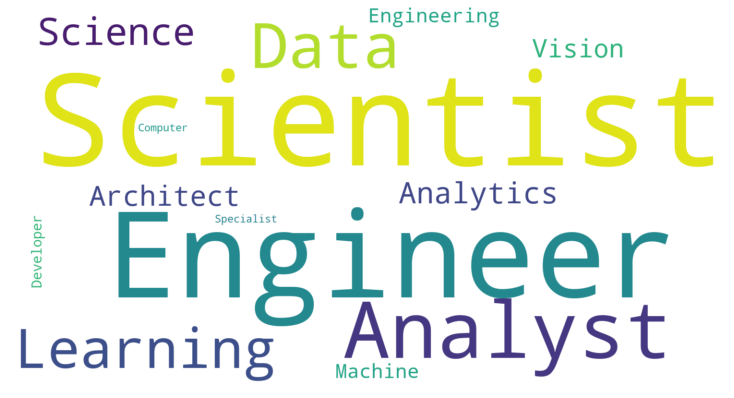

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)

text = " ".join(cat.split()[1] for cat in dataset.job_title.astype('object'))

wordcloud = WordCloud(width = 1500, height = 800,
        collocations = False,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(text)

# plot the WordCloud image					
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


## Conclusões e referências

A base de dados utilizada foi: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries


*   Houve um crescimento da média de salários da área de Ciência dos Dados de 2020 até 2022.

*   Há uma grande variedade de profissionais distintos dentre da área de Ciência dos Dados, mas há uma maior concentração nas seguintes profissões respectivamente: Cientista de Dados, Engenheiro de Dados, Analista de Dados, Engenheiro de Aprendizado de Máquina, Cientista de Pesquisa, Gerente de Ciência dos Dados, Arquiteto de Dados.

*   As profissões de Cientista de Dados, Engenheiro de Dados e Analista de Dados foras as principais profissões da base de dados.

*   Não há relação direta entre tamanho da empresa e salários dos funcionários de Ciência dos Dados. Empresas médias tendem a pagar mais que empresas grandes.

*   As profissões de Ciência dos Dados com maior média salarial foram respectivamente: Lider de Análise de Dados, Engenheiro de Dados Principal, Analista de Dados Financeiro, Cientista de Dados Principal e Diretor de Ciência de dados. 

*   Os países com maior média salarial em Ciência dos Dados foram Rússia, Estados Unidos, Nova Zelândia, Israel, Japão e Austrália, sendo que o Brasil ficou na 42ª posição de 49 colocações.

*   A realidade global de Ciência dos Dados pode não ter sido retratada de forma veridica, já que grande 335 de 607, ou seja, 55% dos dados são de empresas localizadas nos Estados Unidos.

*   Mesmo com grande parte das empresas sendo dos Estados Unidos, os funcionários estão espalhados ao redor do mundo, retratando a globalização da área e que não necessita de presença física no local para trabalhar.

*   As principais palavras que apareceram nos títulos das profissões foram respectivamente: Cientista, Engenheiro, Analista, Dados, Aprendizado e Ciência.









